
#### 1 Tuliskan suatu permasalahan yang akan diselesaikan dengan menggunakan machine learning (ML).
Disini kami membayangkan sebuah sistem untuk mengatasi permasalahan dalam penanganan tindak kriminal dimana adanya pemanfaatan Machine learning untuk meningkatkan efektifitas dalam pencarian DPO
#### 2 Jelaskan mengapa masalah tersebut menarik dan perlu untuk diselesaikan.
Hal ini menarik karena kemampuan aparat keamanan dalam menangani kasus kriminal dirasa masih lambat dan sering kali blunder karena tersangka menghilang
#### 3 Jelaskan keberadaan data untuk permasalahan tersebut dengan menjelaskan cara mencarinya, sumbernya, dan bagaimana detil
disini kami menggunakan berbagai referensi dari Kagggle, google, github, serta sedikit saran dari Chat-GPT dengan data set yang ada di github.
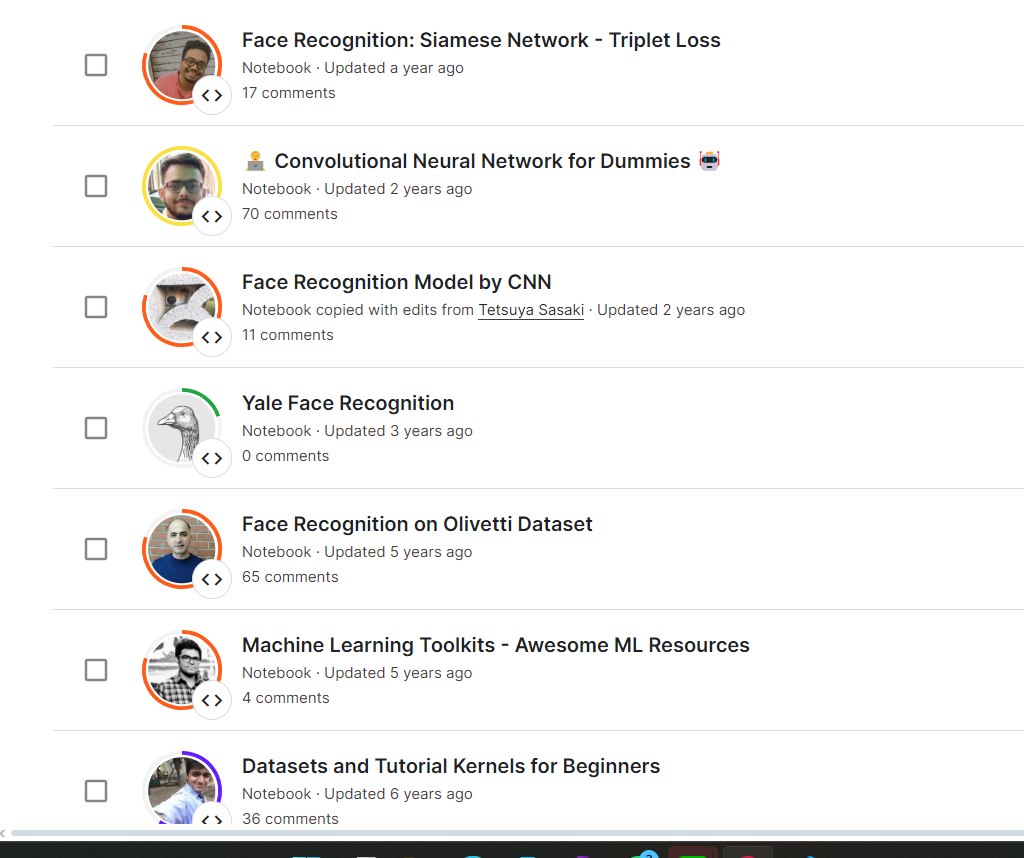
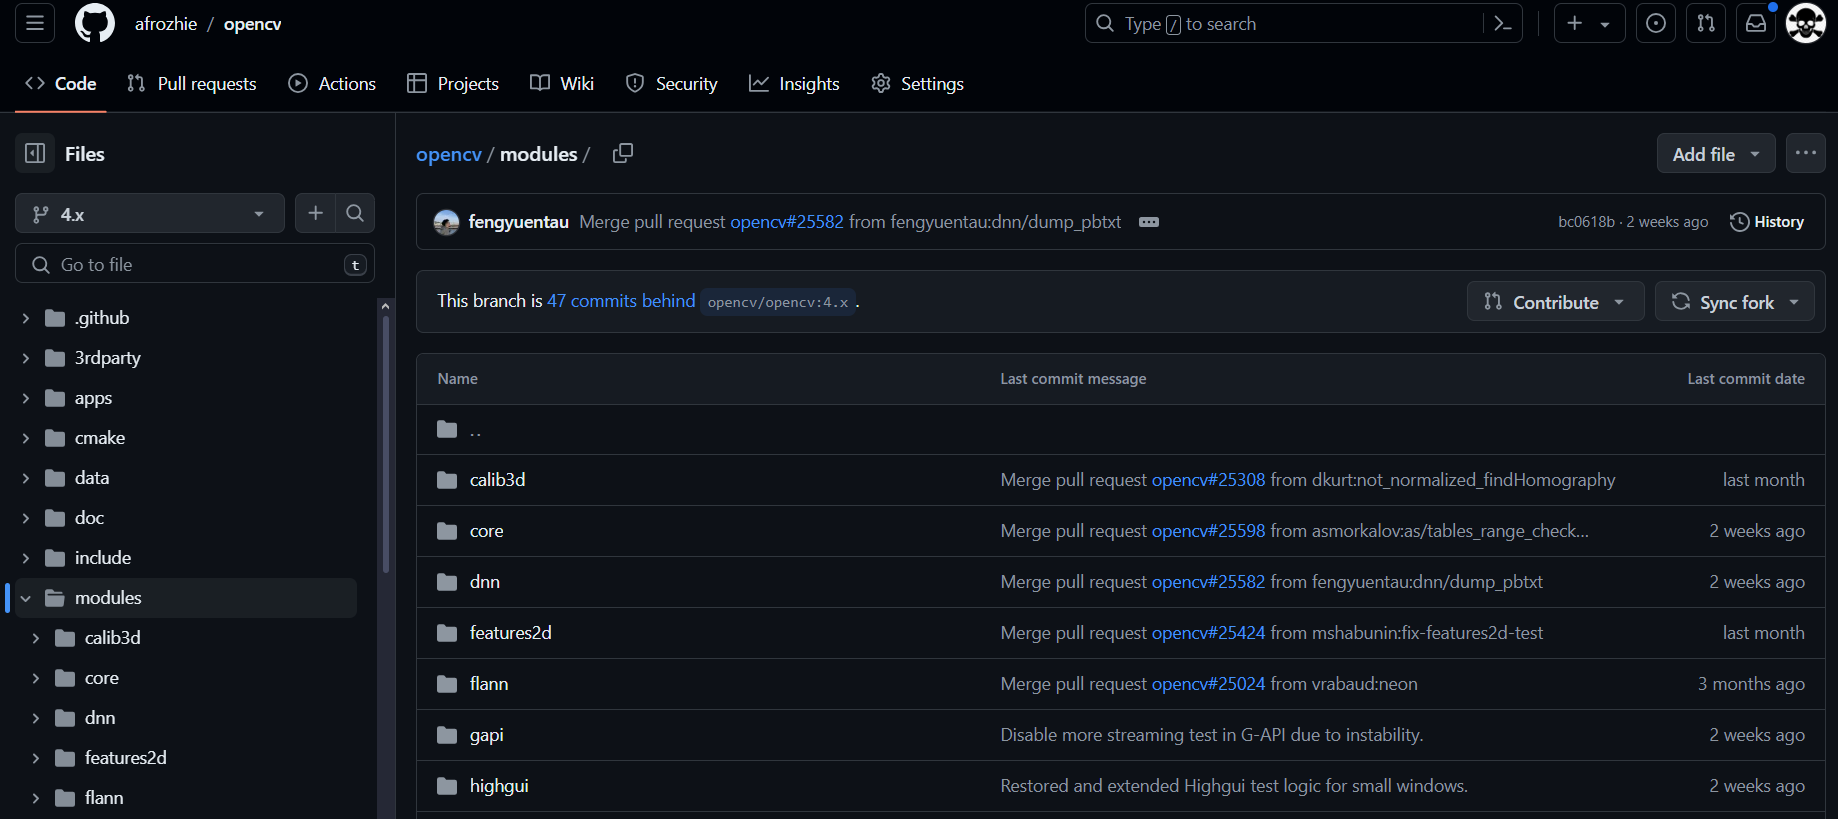
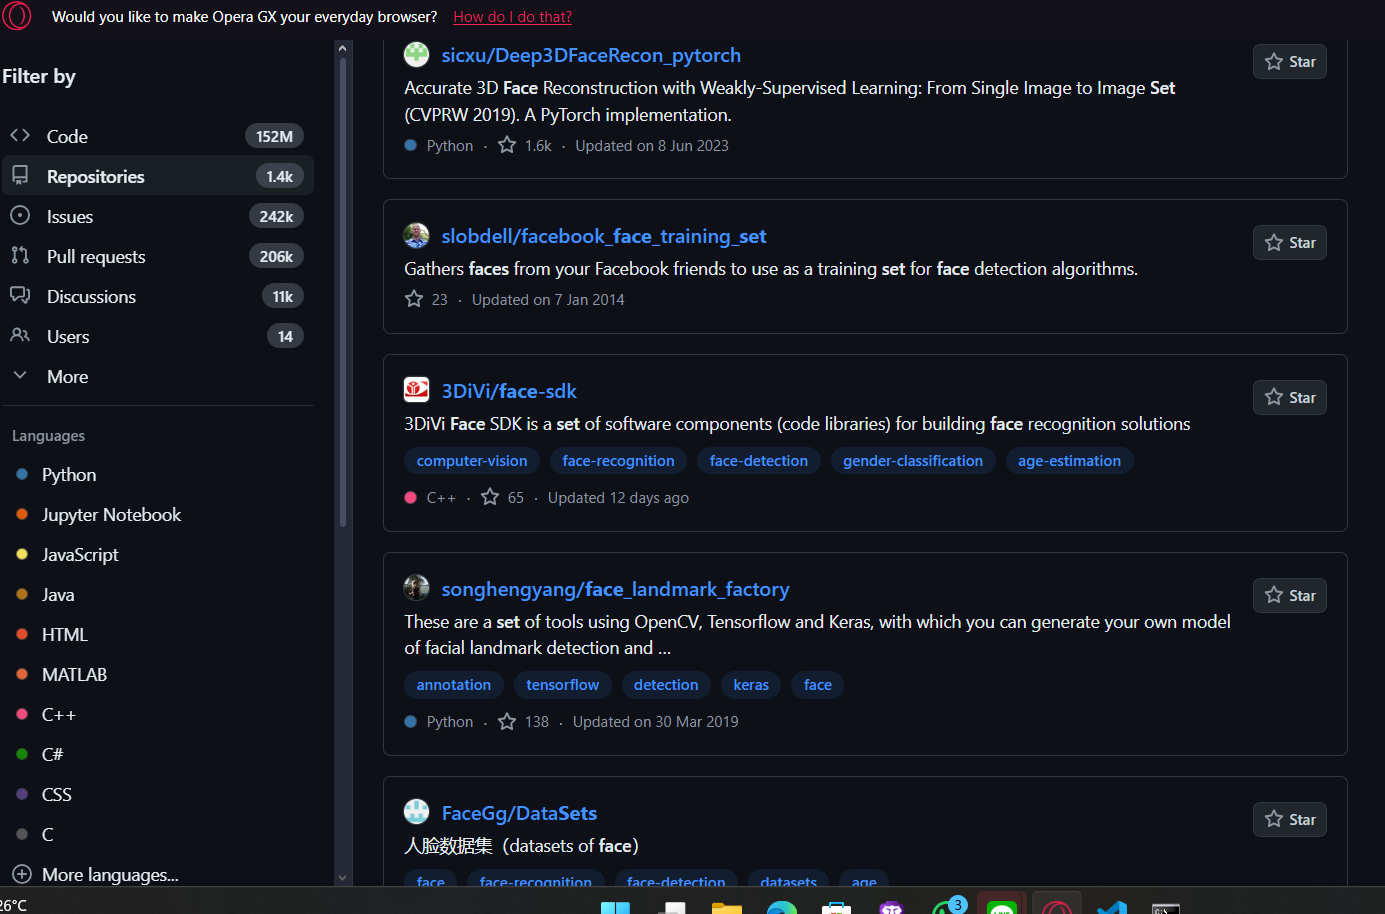
#### 4 Jelaskan jenis data yang digunakan dengan mengacu pada slide mengenai jenis-jenis data.

#### 5 Jelaskan mengenai arsitektur atau model dari ML yang digunakan disertai dengan rujukan mengapa model tersebut cocok untuk permasalahan ini dan data yang digunakan.

Disini kami menggunakan Convolutional Neural Network untuk mengolah data karena beberapa alasan yaitu:

a. Kemampuan Ekstraksi Fitur Hierarkis:
CNN dirancang untuk mengekstraksi fitur dari gambar secara hierarkis.
Fitur Tingkat Rendah: Pada tahap awal, CNN menangkap fitur dasar seperti tepi, sudut, dan tekstur.
Fitur Tingkat Tinggi: Pada tahap selanjutnya, CNN menggabungkan fitur tingkat rendah untuk membentuk fitur yang lebih kompleks seperti mata, hidung, dan mulut.
Membuat Wajah Menjadi Lebih Abstrak: Proses ini memungkinkan CNN untuk mempelajari representasi wajah yang abstrak dan independen dari variasi pencahayaan, pose, dan ekspresi.

b. Toleransi terhadap Variasi:
Wajah manusia dapat bervariasi dalam hal pencahayaan, pose, ekspresi, dan faktor lainnya.
CNN lebih toleran terhadap variasi ini dibandingkan dengan metode pengenalan wajah tradisional.
Kemampuan Generalisasi: Hal ini memungkinkan CNN untuk menggeneralisasi dengan baik ke data baru yang tidak terlihat selama pelatihan.

c. Efisiensi Komputasi:
CNN memanfaatkan operasi matematika seperti konvolusi dan pooling yang efisien secara komputasi.
Memproses Banyak Data: Hal ini memungkinkan CNN untuk memproses banyak data dengan cepat dan akurat.
Penerapan Real-Time: Kemampuan ini membuat CNN ideal untuk aplikasi real-time seperti pengenalan wajah di smartphone dan kamera keamanan.

d. Kemampuan Belajar dari Data Berlabel dan Tidak Berlabel:
CNN dapat dilatih dengan data berlabel (misalnya, gambar wajah dengan label identitas) dan data tidak berlabel (misalnya, gambar wajah tanpa label).
Peningkatan Akurasi: Penggunaan data tidak berlabel dapat membantu meningkatkan akurasi model CNN.
Penerapan Luas: Kemampuan ini memungkinkan CNN untuk digunakan dalam berbagai aplikasi, termasuk deteksi wajah, verifikasi identitas, dan analisis emosi.

#### 6 Tuliskan sumber kode yang digunakan dan bagaimana proses pencariannya sehingga memperoleh sumber tersebut.
Sesuai petunjuk pada pertemuan terakhir kami mencari sumber kode di github dan Kaggle sesuai kriteria dan tujuan kami, dengan pertimbangan kompatibilitas python yang dapat ditemukan,
https://www.kaggle.com/code/sasakitetsuya/face-recognition-model-by-cnn
https://www.kaggle.com/code/serkanpeldek/face-recognition-on-olivetti-dataset
https://github.com/afrozhie/opencv/tree/4.x/modules

#### 7 Jelaskan apakah kode tersebut dapat langsung digunakan atau perlu melakukan modifikasi. Bila pelu melakukan modifikasi, jelaskan modifikasi yang dilakukan secara singkat.
Bila untuk permasalahan yang kami sebutkan di nomor 1 kode ini masih perlu modifikasi dan training, serta nantinya perlua dibuatkan aplikasi untuk mempermudah penggunaannya.

#### 8 Sajikan kode yang diperoleh dilengkapi dengan komentar untuk menjelaskan arti dari masing-masing barisnya. 


In [2]:
#untuk visualisasi data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# modul machine learningnya
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

import os
print(os.listdir("."))

['.ipynb_checkpoints', '1094_1195_1234.ipynb', 'archive.zip', 'cache', 'CNN2.ipynb', 'dataset_faces.npy', 'dataset_faces_target.npy']


In [3]:
# untuk menampilkan warning
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


In [4]:
data=np.load("dataset_faces.npy")
target=np.load("dataset_faces_target.npy")

In [5]:
print("jumlah gambar di dataset : {}".format(len(data)))
print("Jumlah target unik : {}".format(len(np.unique(target))))
print("Ukuran setiap gambar : {}x{}".format(data.shape[1],data.shape[2]))
print("ukuran pixel diperkecil menjadi [0,1] , interval : {}".format(data[0][0,:4]))

jumlah gambar di dataset : 400
Jumlah target unik : 40
Ukuran setiap gambar : 64x64
ukuran pixel diperkecil menjadi [0,1] , interval : [0.30991736 0.3677686  0.41735536 0.44214877]


In [6]:
print("nomor target unik :",np.unique(target))

nomor target unik : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [7]:
# persiapan training ML
def gambar_40_target_berbeda(images, unique_ids):
    # membuat subplot 4 X 10 dengan ukuran figure 18 X 9
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()
    
    # mengiterasi user
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("40 Target Berbeda")

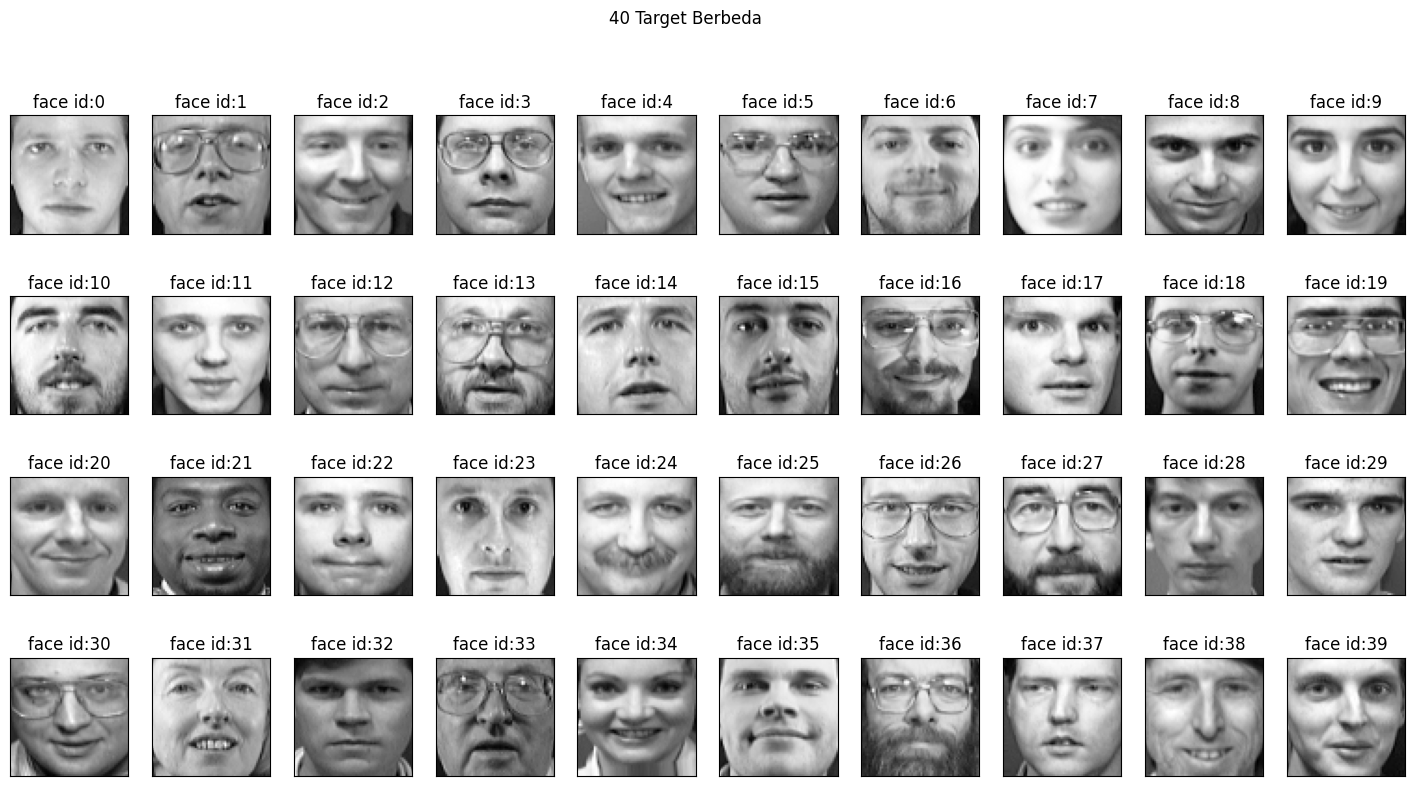

In [9]:
#disini kami tampilkan terlebih dahulu gambar wajah berdasarkan target berbeda
gambar_40_target_berbeda(data, np.unique(target))

In [10]:
def gambar_40_target_berbeda(images, subject_ids):
    cols=10 #setiap subjek memiliki 10 wajah berbeda
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

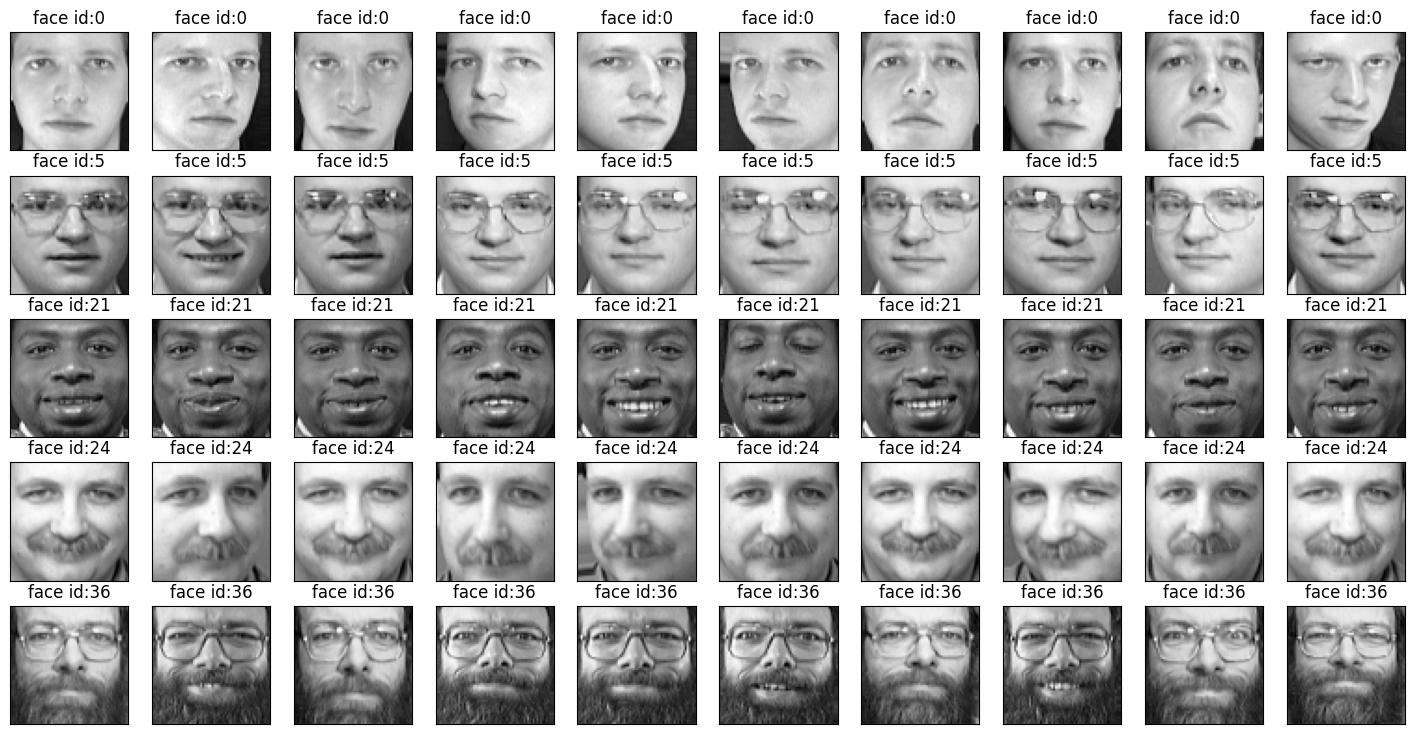

In [11]:
gambar_40_target_berbeda(images=data, subject_ids=[0,5, 21, 24, 36])

In [12]:
#reshape model untuk machine learning
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


<Axes: title={'center': 'Nomor sampel setiap kelas'}, xlabel='subject ids'>

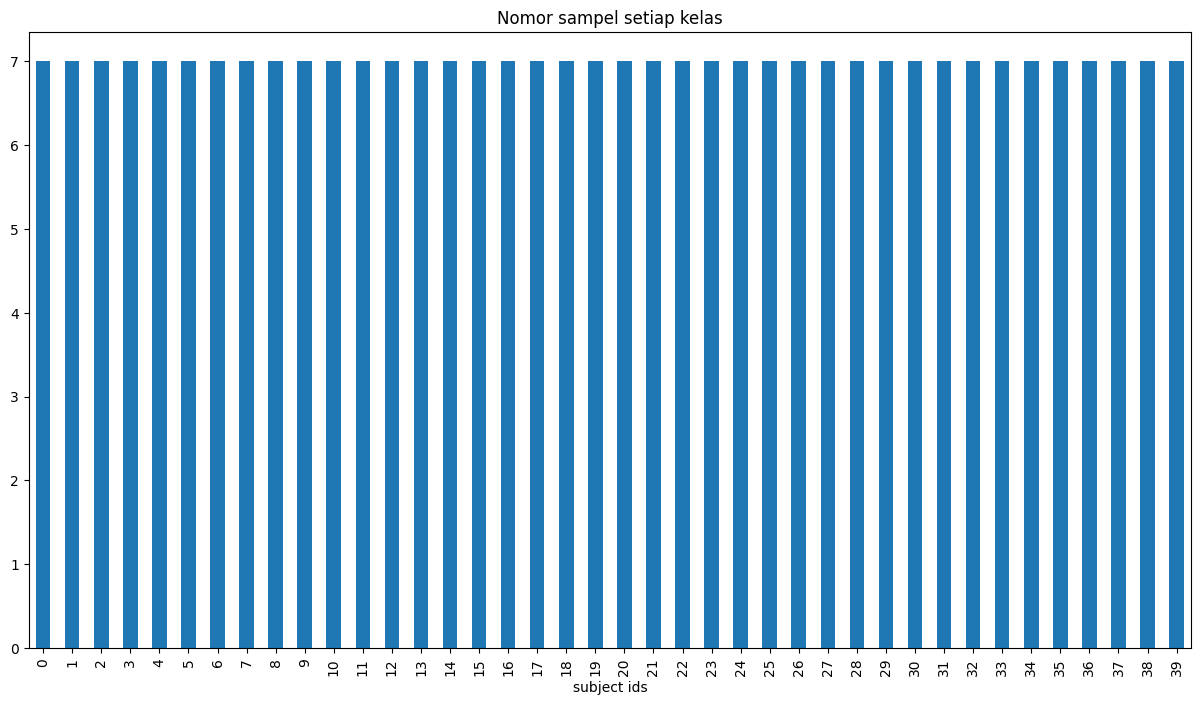

In [21]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Nomor sampel setiap kelas")

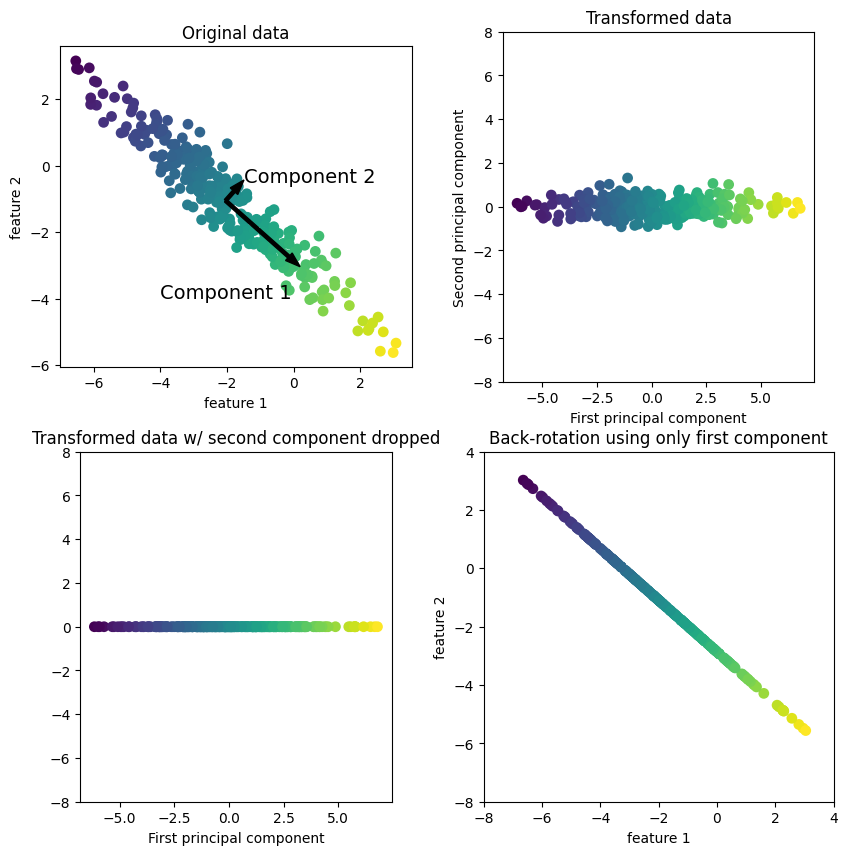

In [14]:
import mglearn
mglearn.plots.plot_pca_illustration()

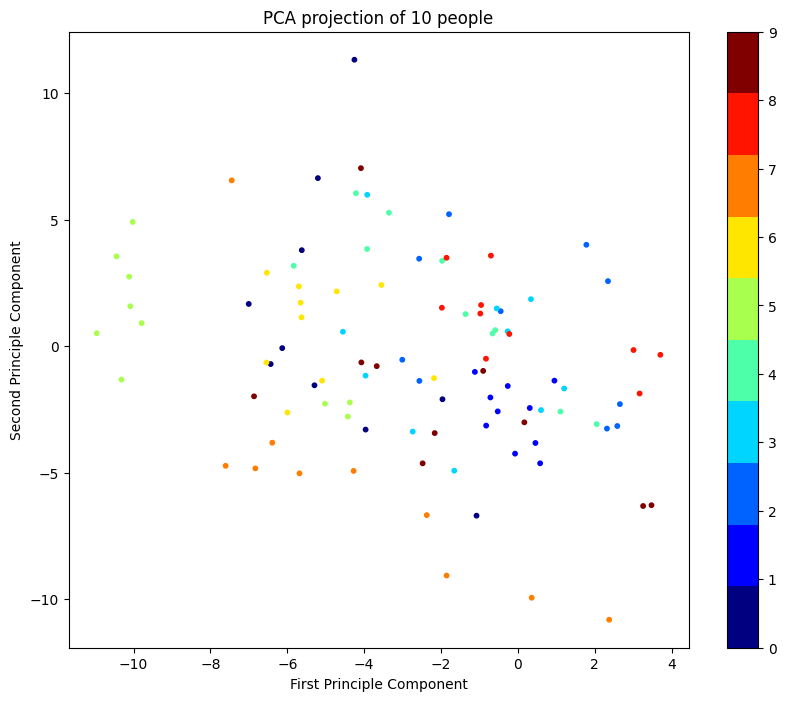

In [18]:
# analisis komponen utama untuk menyederhanakan data mempermudah pembacaan data

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

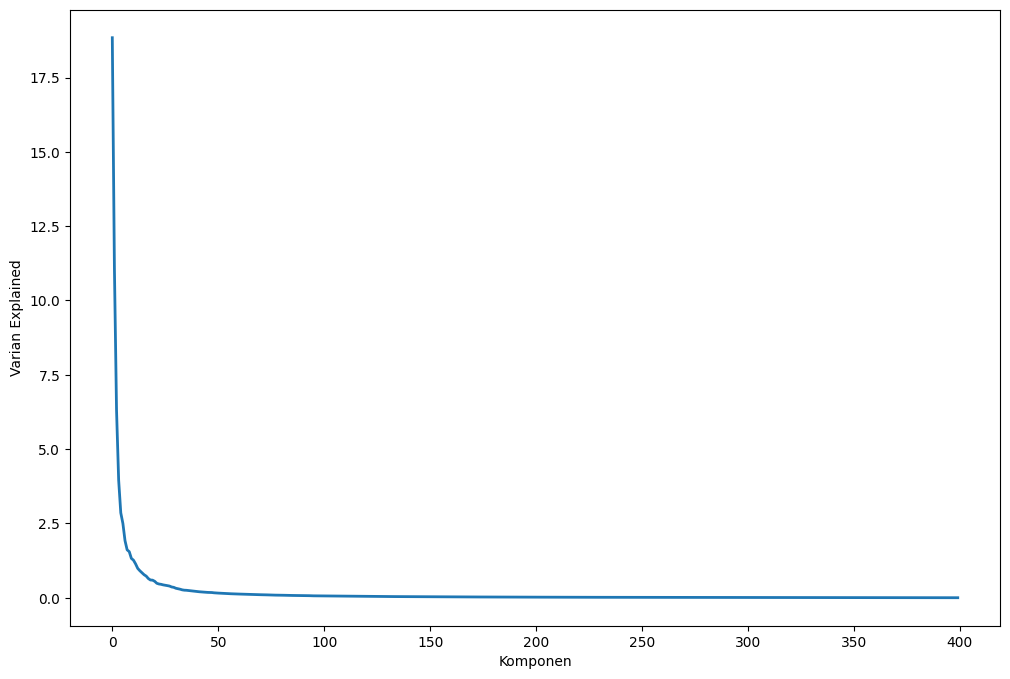

In [19]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Komponen')
plt.ylabel('Varian Explained')
plt.show()

lebih dari 90 komponen PCA menunjukan data yang sama.

In [20]:
n_components=90

pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

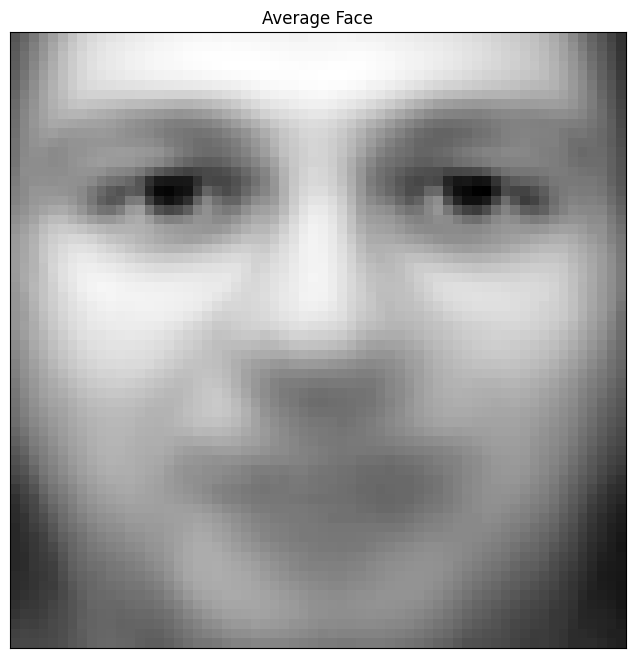

In [21]:
# contoh average face
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

#### 9 Jelaskan hasil yang diperoleh dari ML menggunakan ukuran-ukuran seperti presisi, akurasi, nilai F1, matriks confusion, dan grafik-grafik, seperti hyperspace, boxplot, korelasi, dan lainnya yang diperlukan.

In [22]:
## persiapan visualisasi akurasi, presisi, dsb
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [23]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("Skor Akurasi:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Skor Akurasi:0.92


skor akurasi 0.92

<Axes: >

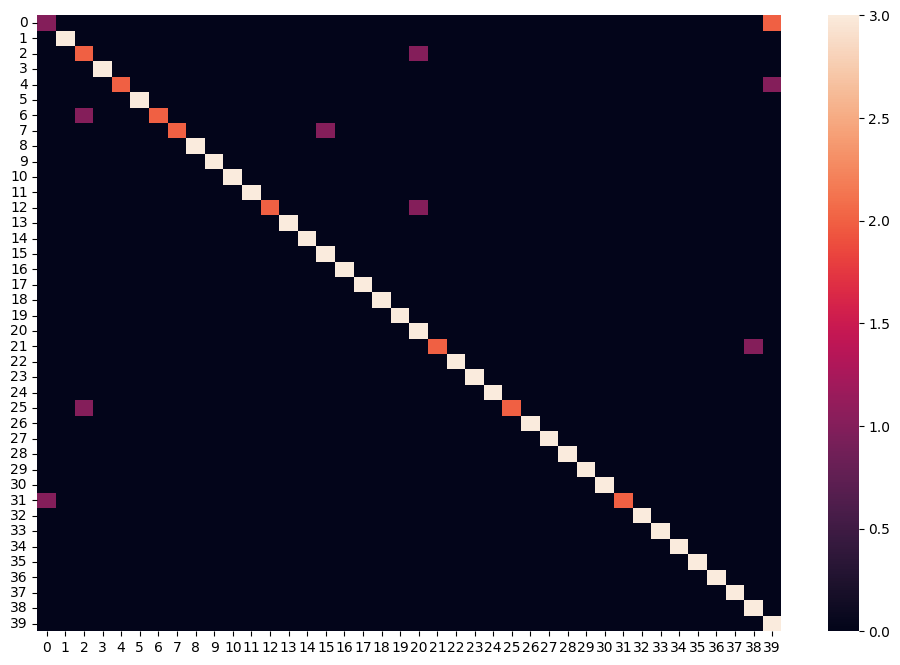

In [24]:
# matriks Confusion
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [26]:
# hasil training
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [28]:
# Detail hasil dengan berbagai model
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Skor Akurasi:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Skor Akurasi:0.93

========== LR RESULT ==========
Skor Akurasi:0.93

========== NB RESULT ==========
Skor Akurasi:0.86

========== KNN RESULT ==========
Skor Akurasi:0.71

========== DT RESULT ==========
Skor Akurasi:0.65

========== SVM RESULT ==========
Skor Akurasi:0.92



hasil terbaik didapatkan dengan model LDA dan LR

In [29]:
# validasi silang
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} Skor Validasi silang rata-rata:{:.2f}".format(name, cv_scores.mean()))

LDA Skor Validasi silang rata-rata:0.97
LR Skor Validasi silang rata-rata:0.94
NB Skor Validasi silang rata-rata:0.78
KNN Skor Validasi silang rata-rata:0.69
DT Skor Validasi silang rata-rata:0.51
SVM Skor Validasi silang rata-rata:0.88


In [31]:
#Skor akurasi LDA
lr=LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
print("Skor Akurasi:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Skor Akurasi:0.93


<Axes: >

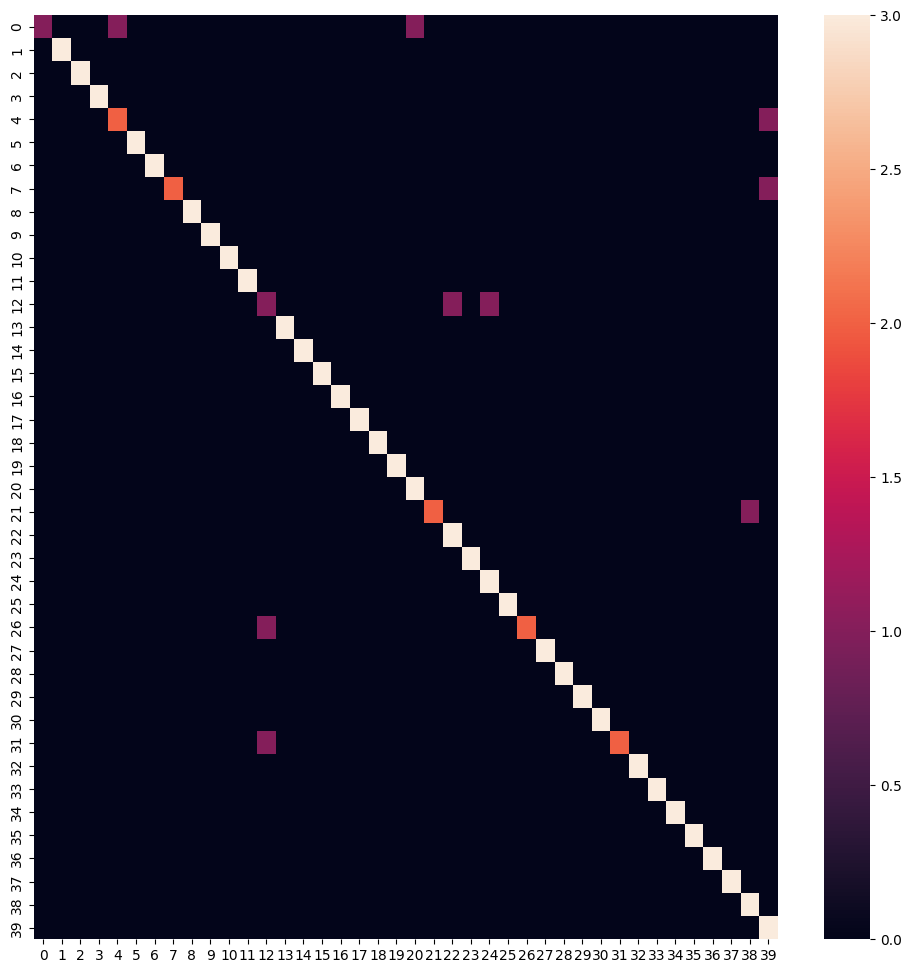

In [32]:
# visualisasi matrikx confusion
cm=metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [33]:
print("Hasil Klasifikasi:\n{}".format(metrics.classification_report(y_test, y_pred)))

Hasil Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.33      0.33      0.33         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
        

In [34]:
# Validasi silan LOO
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LogisticRegression()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Skor akurasi rata-rata validasi silang Leave One Out:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LogisticRegression Skor akurasi rata-rata validasi silang Leave One Out:0.95


In [35]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LinearDiscriminantAnalysis()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Skor akurasi rata-rata validasi silang Leave One Out:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LinearDiscriminantAnalysis Skor akurasi rata-rata validasi silang Leave One Out:0.98


meningkatkan performa model generalisasi dengan GridsearchCV

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

"""
params={'penalty':['l1', 'l2'],
                'C':np.logspace(0, 4, 10)
                }
clf=LogisticRegression()
#kfold=KFold(n_splits=3, shuffle=True, random_state=0)
loo_cv=LeaveOneOut()
gridSearchCV=GridSearchCV(clf, params, cv=loo_cv)
gridSearchCV.fit(X_train_pca, y_train)
print("Grid search fitted..")
print(gridSearchCV.best_params_)
print(gridSearchCV.best_score_)
print("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))
"""


'\nparams={\'penalty\':[\'l1\', \'l2\'],\n                \'C\':np.logspace(0, 4, 10)\n                }\nclf=LogisticRegression()\n#kfold=KFold(n_splits=3, shuffle=True, random_state=0)\nloo_cv=LeaveOneOut()\ngridSearchCV=GridSearchCV(clf, params, cv=loo_cv)\ngridSearchCV.fit(X_train_pca, y_train)\nprint("Grid search fitted..")\nprint(gridSearchCV.best_params_)\nprint(gridSearchCV.best_score_)\nprint("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))\n'

In [37]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_pca, y_train)
print("skor lr:{:.2f}".format(lr.score(X_test_pca, y_test)))

skor lr:0.93


In [38]:
## pelabelan binari
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Target=label_binarize(target, classes=range(40))
print(Target.shape)
print(Target[0])

n_classes=Target.shape[1]

(400, 40)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [39]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(X, 
                                                                                              Target,
                                                                                             test_size=0.3,
                                                                                             stratify=Target,
                                                                                     random_state=0)

pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca=pca.transform(X_train_multiclass)
X_test_multiclass_pca=pca.transform(X_test_multiclass)

oneRestClassifier=OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score=oneRestClassifier.decision_function(X_test_multiclass_pca)

In [41]:
# hasil skor presisi
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i],
                                                        y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])


precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(),
    y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score,
                                                     average="micro")
print('Skor presisi rata-rata, rata-rata mikro di semua kelas: {0:0.2f}'
      .format(average_precision["micro"]))

Skor presisi rata-rata, rata-rata mikro di semua kelas: 0.97


Text(0.5, 1.0, 'Skor presisi rata-rata, rata-rata mikro di semua kelas: AP=0.97')

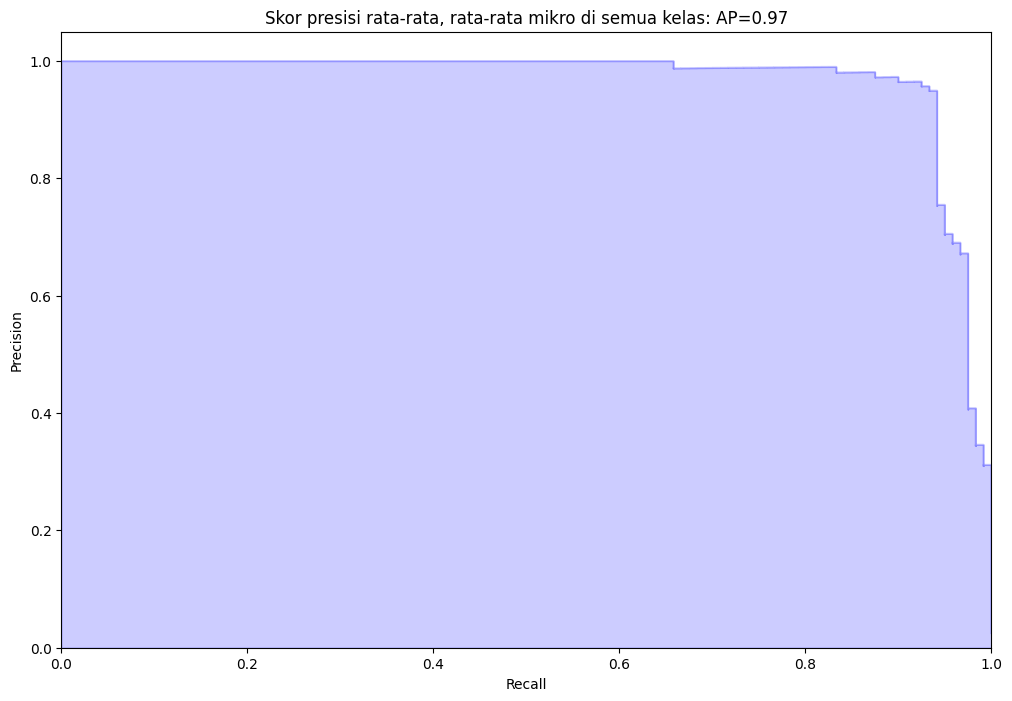

In [42]:
# visualisasi skor presisi
from funcsigs import signature

step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
plt.figure(1, figsize=(12,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Skor presisi rata-rata, rata-rata mikro di semua kelas: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
len(np.unique(y_train))

40

In [44]:
# menggunakan model logistic regression
n_features = X_train.shape[1]

if n_components > min(n_features, n_classes - 1):
    n_components = min(n_features, n_classes - 1)  

lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit(X_train, y_train).transform(X_train)
X_test_lda = lda.transform(X_test)

lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_lda,y_train)
y_pred=lr.predict(X_test_lda)

In [45]:
print("Skor Akurasi:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Hasil Klasifikasi:\n{}".format(metrics.classification_report(y_test, y_pred)))

Skor Akurasi:0.95
Hasil Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00 

In [46]:
from sklearn.pipeline import Pipeline

work_flows_std = list()
work_flows_std.append(('lda', LinearDiscriminantAnalysis(n_components=n_components)))
work_flows_std.append(('logReg', LogisticRegression(C=1.0, penalty="l2")))
model_std = Pipeline(work_flows_std)
model_std.fit(X_train, y_train)
y_pred=model_std.predict(X_test)

In [47]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Accuracy score:0.95
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00    

#### 10 Buat kesimpulan mengenai apa yang telah diselesaikan dalam permasalahan yang dipilih menggunakan ML dan rencana lebih lanjut, seperti penggantian model, penerapannya pada perangkat keras, atapun dilanjutkan dalam tugas akhir.

hasil dari training ini dirasa masih belum cukup, namun dapat menggambarkan untuk penggunaan dalam pengaplikasiannya pada program nanti. untuk programnya sendiri mungkin memerlukan perangkat keras tambahan/yang memadai seperti gpu, spesifikasi komputer yang tinggi serta database yang lengkap terkait data wajah penduduk indonesia beserta data dirinya.